In [1]:
import pandas as pd

In [2]:
import sys
sys.path.append('Users/drdiek/Dropbox/Python/lib')

In [3]:
def initialize_variables():
    # initialize variables for neurites_quantified()
    print "Initializing variables ..."
    
    import pandas as pd
    
    nCells = [0, 0, 0, 0, 0, 0]
    nLayers = [4, 5, 4, 4, 3, 6]
    
    try:
        overlapBinaryDF = pd.read_csv('data/overlap_matrix.csv')
    except IOError:
        print "The file {} does not exist.".format('data/overlap_matrix.csv')
    try:
        neuritesQuantifiedDF = pd.read_excel('data/neurites_quantified_v1.0.xlsx')
    except IOError:
        print "The file {} does not exist.".format('neurites_quantified_v1.0.xlsx')
        
    nCells[0] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 2000])
    nCells[1] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 3000]) - sum(nCells[0:1])
    nCells[2] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 4000]) - sum(nCells[0:2])
    nCells[3] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 5000]) - sum(nCells[0:3])
    nCells[4] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 6000]) - sum(nCells[0:4])
    nCells[5] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] > 5999])
    
    return(nCells, nLayers, overlapBinaryDF, neuritesQuantifiedDF)

In [84]:
def menu_plot(neuritesQuantified):
    import pandas as pd
    from diek_functions import clr

    reply = ''
    

    while (not reply):
    
        clr() # print("\033c"); # clear screen
        print "Please enter a selection from the menu below:\n"
        print "        1) Total length"
        print "        2) % of neurite tree"
        print "        3) Density"
        print "        4) Average maximum path length"
        print "        5) Average mean path length"
        print "        6) Probabilities"
        print "        7) Periodic table"
        print "        !) Exit"
        print ""
        reply = raw_input("Your selection: ")
        
        if reply == '1': # Total length
            quantityDF = neuritesQuantifiedDF['Total_length (micron)']
            selections = [{'string'     : 'Total neurite length ($\mu$m)', \
                           'plotString' : 'Total_Neurite_Length', \
                           'selection'  : 1}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '2': # % of neurite tree
            quantityDF = neuritesQuantifiedDF['%_of_neurite_tree']
            selections = [{'string'     : 'Percent of neurite tree', \
                           'plotString' : 'Percent_of_Neurite_Tree', \
                           'selection'  : 2}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '3': # Density
            quantityDF = neuritesQuantifiedDF['Density']
            selections = [{'string'     : 'Density', \
                           'plotString' : 'Density', \
                           'selection'  : 3}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '4': # Average maximum path length
            quantityDF = neuritesQuantifiedDF['Avg_max_path_length (micron)']
            selections = [{'string'     : 'Avg. max path length ($\mu$m)', \
                           'plotString' : 'Avg_Max_Path_Length', \
                           'selection'  : 4}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '5': # Average mean path length
            quantityDF = neuritesQuantifiedDF['Avg_mean_path_length (micron)']
            selections = [{'string'     : 'Avg. mean path length ($\mu$m)', \
                           'plotString' : 'Avg_Mean_Path_Length', \
                           'selection'  : 5}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '6': # Probabilities
            quantityDF = neuritesQuantifiedDF['Density']
            selections = [{'string'     : 'Probabilities', \
                           'plotString' : 'Probabilities', \
                           'selection'  : 6}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '7': # Periodic table
            quantityDF = neuritesQuantifiedDF['Density']
            selections = [{'string'     : 'Periodic table', \
                           'plotString' : 'Periodic_table', \
                           'selection'  : 7}]            
            quantitySelectionsDF = pd.DataFrame(selections)
        elif reply == '!': # quit
            quantityDF = ''
            selections = ''
            quantitySelectionsDF = '!'
        else:
            reply = ''

    return(quantityDF, quantitySelectionsDF)

In [76]:
def menu_subregion(nCells):
    from diek_functions import clr

    reply = ''
    
    while (not reply):
    
        clr() # print("\033c"); # clear screen
        print "Please select a subregion of interest from the menu below:\n"
        print "        1) Dentate gyrus (DG)"
        print "        2) CA3"
        print "        3) CA2"
        print "        4) CA1"
        print "        5) Subiculum (Sub)"
        print "        6) Entorhinal cortex (EC)"
        print "        A) All"
        print "        !) Exit"
        print ""
        reply = raw_input("Your selection: ")

        if reply == '1': # Dentate gyrus (DG)
            selections = [{'label' : 'DG', \
                           'code'  : 1, \
                           'start' : 0, \
                           'end'   : sum(nCells[0:1])}]            
            subregionDF = pd.DataFrame(selections)
        elif reply == '2': # CA3
            selections = [{'label' : 'CA3', \
                           'code'  : 2, \
                           'start' : sum(nCells[0:1]), \
                           'end'   : sum(nCells[0:2])}]            
            subregionDF = pd.DataFrame(selections)
        elif reply == '3': # CA2
            selections = [{'label' : 'CA2', \
                           'code'  : 3, \
                           'start' : sum(nCells[0:2]), \
                           'end'   : sum(nCells[0:3])}]            
            subregionDF = pd.DataFrame(selections)
        elif reply == '4': # CA1
            selections = [{'label' : 'CA1', \
                           'code'  : 4, \
                           'start' : sum(nCells[0:3]), \
                           'end'   : sum(nCells[0:4])}]            
            subregionDF = pd.DataFrame(selections)
        elif reply == '5': # Subiculum (Sub)
            selections = [{'label' : 'Sub', \
                           'code'  : 5, \
                           'start' : sum(nCells[0:4]), \
                           'end'   : sum(nCells[0:5])}]            
            subregionDF = pd.DataFrame(selections)
        elif reply == '6': # Entorhinal cortex (EC)
            selections = [{'label' : 'EC', \
                           'code'  : 6, \
                           'start' : sum(nCells[0:5]), \
                           'end'   : sum(nCells[0:6])}]            
            subregionDF = pd.DataFrame(selections)
        elif (reply == 'a' or replay == 'A'): # All
            selections = [{'label' : 'All', \
                           'code'  : 0, \
                           'start' : 0, \
                           'end'   : sum(nCells[0:6])}]            
            subregionDF = pd.DataFrame(selections)
        elif reply == '!':
            subregionDF = '!'
        else:
            reply = ''
            
    return(subregionDF)


In [77]:
def average_quantity_values(neuritesQuantifiedDF, quantityDF):
    # average quantity values for neurites_quantified()
    print "Averaging quantity values ..."

    import pandas as pd
    from diek_functions import pause
    
    neuritesDF = neuritesQuantifiedDF['Unique_ID'].apply(str) + ':' + neuritesQuantifiedDF['Neurite']
    
    uniqueNeurites = neuritesDF.unique()
    meansDF = pd.DataFrame([{'Factors'   : 0, \
                             'Means'     : 0, \
                             'Neurites'  : 0, \
                             'UniqueIDs' : 0}])
    
    for i in range(len(uniqueNeurites)):
        idx = neuritesDF.index[neuritesDF == uniqueNeurites[i]]
        meansDF.loc[i, 'Factors'] = len(idx)
        meansDF.loc[i, 'UniqueIDs'] = neuritesQuantifiedDF['Unique_ID'].iloc[idx[0]]
        meansDF.loc[i, 'Neurites'] = neuritesQuantifiedDF['Neurite'].iloc[idx[0]]
        lst = list(quantityDF.iloc[idx])
        meansDF.loc[i, 'Means'] = sum(lst)/float(len(lst))
    
    return(meansDF)

In [78]:
def parcel_lookup(parcel):
    parcels = ('DG:SMo', \
               'DG:SMi', \
               'DG:SG', \
               'DG:H', \
               'CA3:SLM', \
               'CA3:SR', \
               'CA3:SL', \
               'CA3:SP', \
               'CA3:SO', \
               'CA2:SLM', \
               'CA2:SR', \
               'CA2:SP', \
               'CA2:SO', \
               'CA1:SLM', \
               'CA1:SR', \
               'CA1:SP', \
               'CA1:SO', \
               'Sub:SM', \
               'Sub:SP', \
               'Sub:PL', \
               'EC:I', \
               'EC:II', \
               'EC:III', \
               'EC:IV', \
               'EC:V', \
               'EC:VI')
    for i in range(len(parcels)):
        if parcels[i] == parcel:
            parcelNo = i
    return(parcelNo)

In [79]:
def calculate_probabilities(nParcels, overlapBinaryDF, neuritesQuantifiedDF, meansDF):
    # calculate probabilities for neurites_quantified()
    
    import math
    import numpy as np
    import pandas as pd
    from diek_functions import pause
    
    overlapBinaryDataDF = overlapBinaryDF.iloc[:,4:]
    
    axonsDF = (overlapBinaryDataDF == 1) | (overlapBinaryDataDF == 3).astype(int)
    dendritesDF = (overlapBinaryDataDF == 2) | (overlapBinaryDataDF == 3).astype(int)
    
    nNeurons = len(overlapBinaryDF)
    
    overlapBinaryProbabilityDF = pd.DataFrame(np.zeros(shape=(nNeurons, nNeurons)))
    
    print "Calculating overlapBinary probabilities ..."
    for i in range(nNeurons):
        for j in range(nNeurons):
            overlapBinaryProbabilityDF.iloc[i, j] = (2*(overlapBinaryDF.loc[i, 'EorI'] == 'E')-1) * \
                                                     np.sign(sum(axonsDF.iloc[i, :] & dendritesDF.iloc[j, :]))
    overlapBinaryProbabilityDF = overlapBinaryProbabilityDF.astype(int)
    
    axonsDF = dendritesDF = pd.DataFrame(np.zeros(shape=(nNeurons, nParcels)))
    
    for k in range(len(meansDF)):
        i = overlapBinaryDF['UniqueIDs'].index[overlapBinaryDF['UniqueIDs'] == meansDF.loc[k, 'UniqueIDs']]
        neuriteStr = meansDF.loc[k, 'Neurites']
        idx = [pos for pos, char in enumerate(neuriteStr) if char == ':']
        parcel = neuriteStr[:idx[1]]
        j = parcel_lookup(parcel)
        neurite = neuriteStr[idx[1]+1:]
        if neurite == 'A':
            if math.isnan(meansDF.loc[k, 'Means']):
                axonsDF.iloc[i, j] = 0
            else:
                axonsDF.iloc[i, j] = meansDF.loc[k, 'Means']
        else:
            if math.isnan(meansDF.loc[k, 'Means']):
                dendritesDF.iloc[i, j] = 0
            else:
                dendritesDF.iloc[i, j] = meansDF.loc[k, 'Means']

    gradedProbabilityDF = pd.DataFrame(np.zeros(shape=(nNeurons, nNeurons)))
    tensorARR = np.zeros(shape=(nNeurons, nNeurons, nParcels))
    
    print "Calculating graded probabilities and tensors ..."
    for i in range(nNeurons):
        for j in range(nNeurons):
            axonsLST = list(axonsDF.iloc[i, :])
            dendritesLST = list(dendritesDF.iloc[j, :])
            gradedProbabilityDF.iloc[i, j] = sum([a*b for a,b in zip(axonsLST, dendritesLST)])
            for k in range(nParcels):
                tensorARR[i, j, k] = axonsDF.iloc[i, k] * dendritesDF.iloc[j, k]
    
    return(overlapBinaryProbabilityDF, gradedProbabilityDF, tensorARR)

In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from diek_functions import pause
from diek_functions import time_stamp

from plot_functions import HCcolors as c
from plot_functions import make_color_map
from plot_functions import plot_hatch_lines

def plot_probabilities(nCells, overlapBinaryDF, overlapBinaryProbabilityDF, gradedProbabilitiesDF):

    nNeurons = len(overlapBinaryDF)
    
    regionColors = [c.BROWN_DG,
                    c.BROWN_CA3,
                    c.YELLOW_CA2,
                    c.ORANGE_CA1,
                    c.YELLOW_Sub,
                    c.GREEN_EC]
    DG = 0
    CA3 = 1
    CA2 = 2
    CA1 = 3
    Sub = 4
    EC = 5
    
    probabilityColors = [c.GRAY_LIGHT,
                         c.WHITE,
                         c.GRAY_DARK]
              
    nProbabilityColors = len(probabilityColors)
    
    print "Making probability color map ..."
    probabilityColorMap = make_color_map(probabilityColors)
    
    print "Plotting probability background data ..."
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.set_aspect("equal")
    
    ax.axis('off')
    
    plt.pcolormesh(overlapBinaryProbabilityDF.iloc[:,:], cmap=probabilityColorMap)
    
    plt.xlim(-10, nNeurons)
    plt.ylim(-10, nNeurons)
    
    plt.gca().invert_yaxis()
    
    displayFontSize = 0.5
    
    # color-coded tags for the subregions
    ax.add_patch(patches.Rectangle((sum(nCells[:DG]), -1), nCells[DG], 1, edgecolor="none", facecolor=c.BROWN_DG))
    ax.add_patch(patches.Rectangle((sum(nCells[:CA3]), -1), nCells[CA3], 1, edgecolor="none", facecolor=c.BROWN_CA3))
    ax.add_patch(patches.Rectangle((sum(nCells[:CA2]), -1), nCells[CA2], 1, edgecolor="none", facecolor=c.YELLOW_CA2))
    ax.add_patch(patches.Rectangle((sum(nCells[:CA1]), -1), nCells[CA1], 1, edgecolor="none", facecolor=c.ORANGE_CA1))
    ax.add_patch(patches.Rectangle((sum(nCells[:Sub]), -1), nCells[Sub], 1, edgecolor="none", facecolor=c.YELLOW_Sub))
    ax.add_patch(patches.Rectangle((sum(nCells[:EC]), -1), nCells[EC], 1, edgecolor="none", facecolor=c.GREEN_EC))
    
    ax.add_patch(patches.Rectangle((-1, sum(nCells[:DG])), 1, nCells[DG], edgecolor="none", facecolor=c.BROWN_DG))
    ax.add_patch(patches.Rectangle((-1, sum(nCells[:CA3])), 1, nCells[CA3], edgecolor="none", facecolor=c.BROWN_CA3))
    ax.add_patch(patches.Rectangle((-1, sum(nCells[:CA2])), 1, nCells[CA2], edgecolor="none", facecolor=c.YELLOW_CA2))
    ax.add_patch(patches.Rectangle((-1, sum(nCells[:CA1])), 1, nCells[CA1], edgecolor="none", facecolor=c.ORANGE_CA1))
    ax.add_patch(patches.Rectangle((-1, sum(nCells[:Sub])), 1, nCells[Sub], edgecolor="none", facecolor=c.YELLOW_Sub))
    ax.add_patch(patches.Rectangle((-1, sum(nCells[:EC])), 1, nCells[EC], edgecolor="none", facecolor=c.GREEN_EC))

    # parcellation subregion headers
    tab = [sum(nCells[:DG]) + (nCells[DG]+1)/2,
           sum(nCells[:CA3]) + (nCells[CA3]+1)/2,
           sum(nCells[:CA2]) + (nCells[CA2]+1)/2,
           sum(nCells[:CA1]) + (nCells[CA1]+1)/2,
           sum(nCells[:Sub]) + (nCells[Sub]+1)/2,
           sum(nCells[:EC]) + (nCells[EC]+1)/2
          ]
    ax.text(tab[DG], -0.25, "DG", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
    ax.text(tab[CA3], -0.25, "CA3", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
    ax.text(tab[CA2], -0.25, "CA2", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.BLACK)
    ax.text(tab[CA1], -0.25, "CA1", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
    ax.text(tab[Sub], -0.25, "Sub", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.BLACK)
    ax.text(tab[EC], -0.25, "EC", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)

    ax.text(-0.5, tab[DG], "DG", rotation=90, verticalalignment="bottom", horizontalalignment="center",
            fontsize=displayFontSize, color=c.WHITE)
    ax.text(-0.5, tab[CA3], "CA3", rotation=90, verticalalignment="bottom", horizontalalignment="center",
            fontsize=displayFontSize, color=c.WHITE)
    ax.text(-0.5, tab[CA2], "CA2", rotation=90, verticalalignment="bottom", horizontalalignment="center",
            fontsize=displayFontSize, color=c.BLACK)
    ax.text(-0.5, tab[CA1], "CA1", rotation=90, verticalalignment="bottom", horizontalalignment="center",
            fontsize=displayFontSize, color=c.WHITE)
    ax.text(-0.5, tab[Sub], "Sub", rotation=90, verticalalignment="bottom", horizontalalignment="center",
            fontsize=displayFontSize, color=c.BLACK)
    ax.text(-0.5, tab[EC], "EC", rotation=90, verticalalignment="bottom", horizontalalignment="center",
            fontsize=displayFontSize, color=c.WHITE)

    for i in range(nNeurons):
        textColor = c.BLACK
        if overlapBinaryDF.loc[i, 'EorI'] == 'I':
            textColor = c.GRAY
        ax.text(i+0.5, -1.25, overlapBinaryDF.loc[i, 'Abbreviations'], rotation=90, horizontalalignment="center",
                verticalalignment="bottom", fontsize=displayFontSize, color=textColor)
        ax.text(-1.25, i+0.5, overlapBinaryDF.loc[i, 'Abbreviations'], rotation=0, horizontalalignment="right",
                verticalalignment="center", fontsize=displayFontSize, color=textColor)

    for i in range(nNeurons):
        for j in range(nNeurons):
            if gradedProbabilityDF.iloc[i, j] > 0:
                strng = '{:.2e}'.format(gradedProbabilityDF.iloc[i, j])
                if overlapBinaryProbabilityDF.iloc[i, j] == 0:
                    textColor = c.BLACK
                    if overlapBinaryDF.loc[i, 'EorI'] == 'I':
                        textColor = c.GRAY
                    ax.text(j+1.5, i+0.5, strng, rotation=0, horizontalalignment="center", fontsize=displayFontSize/2,
                            color=textColor)
                else:
                    faceColor = c.BLACK
                    if overlapBinaryDF.loc[i, 'EorI'] == 'I':
                        faceColor = c.GRAY
                    ax.add_patch(patches.Rectangle((j, i), # (x,y)
                                                   1,             # width
                                                   1,             # height
                                                   edgecolor="none",
                                                   facecolor=faceColor
                                                  )
                                )
                    ax.text(j+1.5, i+0.5, strng, rotation=0, horizontalalignment="center", fontsize=displayFontSize/2,
                            color=c.WHITE)

    plt.show()
    
    # save plot
    outputFileName = "output/probability_matrix_%s.pdf" % time_stamp()
    print "Saving data to pdf file %s ...\n" % outputFileName    
    fig.savefig(outputFileName, dpi=600)
    
    return()
    

In [96]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from diek_functions import pause
from diek_functions import time_stamp

from plot_functions import HCcolors as c
from plot_functions import make_color_map
from plot_functions import plot_hatch_lines

def plot_overlap_binary(nCells, nLayers, overlapBinaryDF, quantitySelectionsDF, subregionDF):

    nNeurons = len(overlapBinaryDF)
    nRows, nColumns = overlapBinaryDF.shape
    nParcels = nColumns - 4 # account for header columns (UniqueIDs - EorI)
    
    overlapBinaryLayers = overlapBinaryParcels = list(overlapBinaryDF)[4:]
    for j in range(nParcels):
        idx = [pos for pos, char in enumerate(overlapBinaryParcels[j]) if char == ':']
        overlapBinaryLayers[j] = overlapBinaryParcels[j][idx[0]+1:]
    
    regionColors = [c.BROWN_DG,
                    c.BROWN_CA3,
                    c.YELLOW_CA2,
                    c.ORANGE_CA1,
                    c.YELLOW_Sub,
                    c.GREEN_EC]
    DG = 0
    CA3 = 1
    CA2 = 2
    CA1 = 3
    Sub = 4
    EC = 5
    
    START = subregionDF.loc[0, 'start']
    END = subregionDF.loc[0, 'end']
    
    nNeuronsDisplayed = END - START
    
    if subregionDF['label'] is 'All':
        displayFontSize = 2.5
    else:
        displayFontSize = 5
        
    overlapBinaryColors = [c.WHITE,        # 0
                           c.RED_LIGHT,    # 1
                           c.BLUE_LIGHT,   # 2
                           c.PURPLE_LIGHT] # 3
              
    nOverlapBinaryColors = len(overlapBinaryColors)
    
    print "Making overlap binary color map ..."
    overlapBinaryColorMap = make_color_map(overlapBinaryColors)
    
    print "Plotting overlap binary background data ..."
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.set_aspect("equal")
    
    ax.axis('off')
    
    overlapBinaryDataDF = overlapBinaryDF.iloc[:,4:]
    CijOverlap = overlapBinaryDataDF.iloc[START:(END+1), :]
    plt.pcolormesh(CijOverlap, cmap=overlapBinaryColorMap, edgecolors=c.BLACK, linewidth=0.1)
    
    vStart = -3
    
    plt.xlim(-12, nParcels)
    plt.ylim(vStart, nNeuronsDisplayed)
    
    plt.gca().invert_yaxis()
    
    # Add hatch lines to the colored squares
    shadingLineWidths = 0.2
    for i in range(nNeuronsDisplayed):
        for j in range(nParcels):
            if ((CijOverlap.iloc[i,j] == 1) or (CijOverlap.iloc[i,j] == 3)): # axons
                plt.plot([j+0.5, j+0.5], [i+0.1, i+0.9], color=c.WHITE, linewidth=shadingLineWidths)
            if ((CijOverlap.iloc[i,j] == 2) or (CijOverlap.iloc[i,j] == 3)): # dendrites
                plt.plot([j+0.1, j+0.9], [i+0.5, i+0.5], color=c.WHITE, linewidth=shadingLineWidths)
    
    # color-coded tags for the subregions
    ax.add_patch(patches.Rectangle((sum(nLayers[:DG]), vStart), nLayers[DG], 3, edgecolor="none",
                                   facecolor=c.BROWN_DG))
    ax.add_patch(patches.Rectangle((sum(nLayers[:CA3]), vStart), nLayers[CA3], 3, edgecolor="none",
                                   facecolor=c.BROWN_CA3))
    ax.add_patch(patches.Rectangle((sum(nLayers[:CA2]), vStart), nLayers[CA2], 3, edgecolor="none",
                                   facecolor=c.YELLOW_CA2))
    ax.add_patch(patches.Rectangle((sum(nLayers[:CA1]), vStart), nLayers[CA1], 3, edgecolor="none",
                                   facecolor=c.ORANGE_CA1))
    ax.add_patch(patches.Rectangle((sum(nLayers[:Sub]), vStart), nLayers[Sub], 3, edgecolor="none",
                                   facecolor=c.YELLOW_Sub))
    ax.add_patch(patches.Rectangle((sum(nLayers[:EC]), vStart), nLayers[EC], 3, edgecolor="none",
                                   facecolor=c.GREEN_EC))
    
    hTab = -9

    # add title label to plot
    if (subregionDF.loc[0, 'label'] == 'All'):
        displayFontSize = 1
    else:
        displayFontSize = 5
    ax.text(hTab, -1.5, quantitySelectionsDF.loc[0, 'string'], rotation=0, horizontalalignment="left",
            fontsize=displayFontSize, color=c.BLACK)

    # parcellation subregion headers
    tab = [sum(nLayers[:DG]) + (nLayers[DG]+1)/2,
           sum(nLayers[:CA3]) + (nLayers[CA3]+0.5)/2,
           sum(nLayers[:CA2]) + (nLayers[CA2]+1)/2,
           sum(nLayers[:CA1]) + (nLayers[CA1]+1)/2,
           sum(nLayers[:Sub]) + (nLayers[Sub]+0.5)/2,
           sum(nLayers[:EC]) + (nLayers[EC]+1)/2
          ]
    ax.text(tab[DG], -2, "DG", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
    ax.text(tab[CA3], -2, "CA3", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
    ax.text(tab[CA2], -2, "CA2", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.BLACK)
    ax.text(tab[CA1], -2, "CA1", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
    ax.text(tab[Sub], -2, "Sub", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.BLACK)
    ax.text(tab[EC], -2, "EC", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)

    for j in range(sum(nLayers)):
        ax.text(j+0.5, -0.1, overlapBinaryLayers[j], rotation=90, horizontalalignment="center", 
                verticalalignment="bottom", fontsize=displayFontSize, color=c.WHITE)
    for j in range(sum(nLayers[:CA2]), sum(nLayers[:CA1])):
        ax.text(j+0.5, -0.1, overlapBinaryLayers[j], rotation=90, horizontalalignment="center", 
                verticalalignment="bottom", fontsize=displayFontSize, color=c.BLACK)
    for j in range(sum(nLayers[:Sub]), sum(nLayers[:EC])):
        ax.text(j+0.5, -0.1, overlapBinaryLayers[j], rotation=90, horizontalalignment="center", 
                verticalalignment="bottom", fontsize=displayFontSize, color=c.BLACK)

    # cell type subregion headers
    strng = 'DG'
    vCorrection = 0.0
    if ((subregionDF.loc[0, 'label'] == 'DG') or (subregionDF.loc[0, 'label'] == 'All')):
        DGstart = nCells[DG]/2
        ax.text(hTab, DGstart+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    strng = 'CA3'
    vCorrection = 0.0
    if (subregionDF.loc[0, 'label'] == 'CA3'):
        CA3start = nCells[CA3]/2
        ax.text(hTab, CA3start+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    elif (subregionDF.loc[0, 'label'] == 'All'):
        CA3start = sum(nCells[:CA3]) + nCells[CA3]/2
        ax.text(hTab, CA3start+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    strng = 'CA2'
    vCorrection = 0.0
    if (subregionDF.loc[0, 'label'] == 'CA2'):
        CA2start = nCells[CA2]/2
        ax.text(hTab, CA2start+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    elif (subregionDF.loc[0, 'label'] == 'All'):
        CA2start = sum(nCells[:CA2]) + nCells[CA2]/2
        ax.text(hTab, CA2start+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    strng = 'CA1'
    vCorrection = 0.0
    if (subregionDF.loc[0, 'label'] == 'CA1'):
        CA1start = nCells[CA1]/2
        ax.text(hTab, CA1start+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    elif (subregionDF.loc[0, 'label'] == 'All'):
        CA1start = sum(nCells[:CA1]) + nCells[CA1]/2
        ax.text(hTab, CA1start+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    strng = 'Sub'
    vCorrection = 0.0
    if (subregionDF.loc[0, 'label'] == 'Sub'):
        Substart = nCells[Sub]/2
        ax.text(hTab, Substart+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    elif (subregionDF.loc[0, 'label'] == 'All'):
        Substart = sum(nCells[:Sub]) + nCells[Sub]/2
        ax.text(hTab, Substart+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    strng = 'EC'
    vCorrection = 0.0
    if (subregionDF.loc[0, 'label'] == 'EC'):
        ECstart = nCells[EC]/2
        ax.text(hTab, ECstart+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)
    elif (subregionDF.loc[0, 'label'] == 'All'):
        ECstart = sum(nCells[:EC]) + nCells[EC]/2
        ax.text(hTab, ECstart+vCorrection, strng, horizontalalignment="center", rotation=90,
                fontsize=displayFontSize, color=c.BLACK)

    # thick horizontal lines on cell type axis
    if (subregionDF.loc[0, 'label'] == 'All'):
        lineWidth = 0.2
        CA3line = sum(nCells[:CA3])
        CA2line = sum(nCells[:CA2])
        CA1line = sum(nCells[:CA1])
        Subline = sum(nCells[:Sub])
        ECline = sum(nCells[:EC])
        
        ax.plot([hTab, nParcels], [CA3line, CA3line], linewidth=lineWidth, color=c.BLACK)
        ax.plot([hTab, nParcels], [CA2line, CA2line], linewidth=lineWidth, color=c.BLACK)
        ax.plot([hTab, nParcels], [CA1line, CA1line], linewidth=lineWidth, color=c.BLACK)
        ax.plot([hTab, nParcels], [Subline, Subline], linewidth=lineWidth, color=c.BLACK)
        ax.plot([hTab, nParcels], [ECline, ECline], linewidth=lineWidth, color=c.BLACK)

    # plot labels
    for i in range(START, END):
        hTab = -0.5
        labelCode = "{0:s} ({1:d})".format(overlapBinaryDF.loc[i, 'Names'], int(meansDF.loc[i, 'Factors']))
        labelColor = c.BLACK
        if overlapBinaryDF.loc[i, 'EorI'] == 'I':
            labelColor = c.GRAY
        ax.text(hTab, i-START+0.5, labelCode, rotation=0, horizontalalignment="right", verticalalignment="center",
                fontsize=displayFontSize, color=labelColor)
        
    plt.show()
    
    # save plot
    outputFileName = "output/{0:s}_matrix_{1:s}.pdf".format(quantitySelectionsDF.loc[0, 'plotString'], time_stamp())
    print "Saving data to pdf file %s ...\n" % outputFileName    
    fig.savefig(outputFileName, dpi=600)

    return


Initializing variables ...
c
Please enter a selection from the menu below:

        1) Total length
        2) % of neurite tree
        3) Density
        4) Average maximum path length
        5) Average mean path length
        6) Probabilities
        7) Periodic table
        !) Exit

Your selection: 5
c
Please select a subregion of interest from the menu below:

        1) Dentate gyrus (DG)
        2) CA3
        3) CA2
        4) CA1
        5) Subiculum (Sub)
        6) Entorhinal cortex (EC)
        A) All
        !) Exit

Your selection: 5
Averaging quantity values ...
Making overlap binary color map ...
Plotting overlap binary background data ...


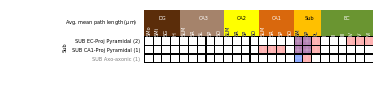

Saving data to pdf file output/Avg_Mean_Path_Length_matrix_201710161735.pdf ...



NameError: name 'plot_quantity' is not defined

In [95]:
nCells, nLayers, overlapBinaryDF, neuritesQuantifiedDF = initialize_variables()

quantityDF, quantitySelectionsDF = menu_plot(neuritesQuantifiedDF)

if isinstance(quantitySelectionsDF, pd.DataFrame):
    subregionDF = pd.DataFrame([{'selection' : 0}])
    if quantitySelectionsDF.loc[0, 'selection'] != 6:
        subregionDF = menu_subregion(nCells)

    if isinstance(subregionDF, pd.DataFrame):
        meansDF = average_quantity_values(neuritesQuantifiedDF, quantityDF)
        if quantitySelectionsDF.loc[0, 'selection'] > 5: 
            overlapBinaryProbabilityDF, gradedProbabilityDF, tensorARR = calculate_probabilities(nParcels,\
                                                                                                 overlapBinaryDF,\
                                                                                                 neuritesQuantifiedDF,\
                                                                                                 meansDF)
            if quantitySelectionsDF.loc[0, 'selection'] == 6: # Probabilities
                plot_probabilities(nCells, overlapBinaryDF, overlapBinaryProbabilityDF, gradedProbabilityDF)
            else: # quantitySelectionDF.loc[0, 'selection'] == 7; Periodic table
                plot_periodic_table(nCells, quantityDF, neuritesQuantifiedDF, overlapBinaryDF, subregionDF)
        else:
            plot_overlap_binary(nCells, nLayers, overlapBinaryDF, quantitySelectionsDF, subregionDF)
            plot_quantity(overlapBinaryDF, neuritesQuantifiedDF, quantityDF, subregionDF)

In [40]:
a = [1, 2, 3]
print sum(a[:2])


3
